## Author : Muhammad Ishaq

Task 1 : Prediction using supervised ML

In [1]:
# Importing all libraries required in this notebook

from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd

## Reading Data from online source 

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(15)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

In [ ]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## Preparing  the Data 

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [9]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

## Training

spliting our data into training and testing sets, and now is finally the time to train our algorithm.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0) 
regressor = LinearRegression()  
regressor.fit(X_train.reshape(-1,1), y_train) 

print("Training complete.")

Training complete.


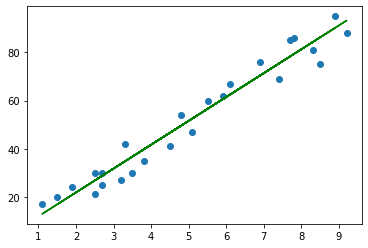

In [14]:
## Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color ="green");
plt.show()

## Making Predictions

Now that we have trained our algorithm, it's time to make some predictions.

In [15]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


## Comparing Actual vs Predicted

In [16]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [19]:
#Estimating train  and  test  score 
print("train score", regressor.score(X_train,y_train))
print("test score", regressor.score(X_test,y_test))

train score 0.9515510725211552
test score 0.9454906892105356


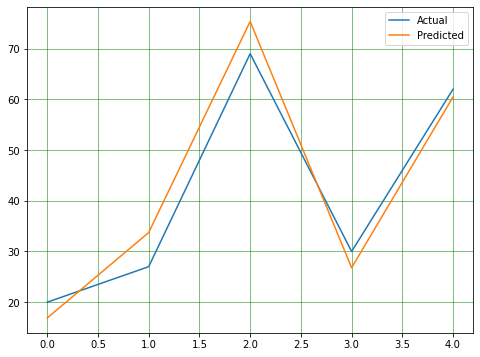

In [20]:
#plotting line graph to depict difference between the actual and predicted
df.plot(kind='line',figsize=(8,6))
plt.grid(which='major', linewidth='0.5',color ='red')
plt.grid(which='major', linewidth='0.5',color ='green')
plt.show()

In [25]:
#  test with your own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_predi = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_predi[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


## Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [26]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [27]:
print('Mean squared  Error:', metrics.mean_squared_error(y_test, y_pred)) 

Mean squared  Error: 21.5987693072174


## successfully completed  predictions  using supervised  ML